# Linear Regression

## Import thư viện

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Input Data

In [162]:
df=pd.read_csv("USA_Housing.csv")
df=df.drop('Address',axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


**Giải thích:**
- Avg. Area Income: Thu nhập trung bình trong khu vực. 
- Avg. Area House Age: Độ tuổi trung bình của các ngôi nhà trong khu vực.
- Avg. Area Number of Rooms: Số phòng trung bình của các nhà trong khu vực.
- Avg. Area Number of Bedrooms: Số giường trung bình của các nhà trong khu vực.
- Area Population: Dân số trong khu vực.

In [163]:
X=df.iloc[:500,:-1]
y=df.iloc[:500,-1]

In [164]:
X.shape

(500, 5)

## Chia dữ liệu thành 2 tập train và tập test

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [167]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
161,63312.805675,6.139115,8.199615,4.41,43230.352158
72,57279.063576,5.118109,6.561520,3.17,44023.790685
246,65382.888323,5.396819,7.648386,6.08,41723.054741
230,75487.032599,6.453932,7.737096,4.02,41105.390630
391,67269.995543,6.325822,7.472850,6.39,41780.473692


In [168]:
y_train=y_train.values
y_test=y_test.values

In [169]:
y_train=y_train/(1e+6)
y_test=y_test/(1e+6)

**Shape:**

In [170]:
X_train.shape

(400, 5)

In [171]:
m=X_train.shape[0]
n=X_train.shape[1]
m,n

(400, 5)

X_train có 5 feature và 400 mẫu dữ liệu. Do đó m=400, n=5.

## Feature Scaling

**Cách 1:** Dùng thư viện(ta sẽ chuẩn hóa cho X_train)

In [172]:
from sklearn import preprocessing

In [173]:
X_train_scaler = preprocessing.StandardScaler().fit_transform(X_train)

In [174]:
X_train_scaler

array([[-0.5056618 ,  0.05480916,  1.16068759,  0.31422091,  0.76963778],
       [-1.1003971 , -0.97863251, -0.3964599 , -0.68535306,  0.85044028],
       [-0.30161741, -0.69652774,  0.63669781,  1.66042134,  0.61613704],
       ...,
       [ 0.91578336, -0.46607379, -0.96081033, -0.63698657, -0.36644845],
       [-1.75936202, -1.60779921,  0.46487141,  0.37870956, -0.1353348 ],
       [ 0.93527476,  0.42179577, -0.31457446, -0.55637577, -1.27199243]])

**Cách 2:** Thực hiện feature scaling theo Z-score Nomarlization (ta sẽ chuẩn hóa cho X_test)<br>
$$scaler_j^{(i)}=\frac{x_j^{(i)}-\mu_j}{\sigma_j}$$

In [175]:
sigma=np.zeros(n)
mu=np.zeros(n)
for i in range(n):
    sigma[i]=np.std(X_test.iloc[:,i])
    mu[i]=np.mean(X_test.iloc[:,i])
sigma,mu

(array([1.09700068e+04, 1.00113166e+00, 1.02388854e+00, 1.17901828e+00,
        1.01810366e+04]),
 array([6.68055382e+04, 5.89965971e+00, 6.93851668e+00, 3.87830000e+00,
        3.57952844e+04]))

In [176]:
m=len(X_test)
X_test_scaler=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        X_test_scaler[i,j]=(X_test.iloc[i,j]-mu[j])/sigma[j]

## Triển khai mô hình:

### Output của mô hình:

In [177]:
def calculate_model_output(x,w,b):
    m=len(x)
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=np.dot(w,x[i,:])+b
    return f_wb

### Hàm chi phí:

In [178]:
def calculate_cost_fuction(x,y,w,b):
    m=len(x)
    J_wb=0
    for i in range(m):
        J_wb+=(calculate_model_output(x,w,b)[i]-y[i])**2
    J_wb/=(2*m)
    return J_wb

### Triển khai gradient descent

In [200]:
def gradient_descent(x,y,iterations=1000,learning_rate=0.0001,stopping_threshold = 1e-4):
    m=x.shape[0]
    n=x.shape[1]
    dj_dw=np.zeros(n)
    dj_db=0
    current_weights=np.array([0.25,0.2,0.16,0.05,0.2])
    current_bias=1.256
    previous_cost=None
    for i in range(iterations):
        f_wb=calculate_model_output(x,current_weights,current_bias)
        current_cost= calculate_cost_fuction(x,y,current_weights,current_bias)
        if previous_cost and abs(current_cost-previous_cost)<=stopping_threshold:
            break
        previous_cost=current_cost
        for j in range(n):
            dj_dw[j]=np.sum((f_wb-y)*x[:,j])
        dj_db=np.sum(f_wb-y)
        current_weights-=learning_rate*dj_dw
        current_bias-=learning_rate*dj_db
        print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weights}, Bias {current_bias}")
    return current_weights,current_bias

In [201]:
w,b=gradient_descent(X_train_scaler,y_train,iterations=100)

Iteration 1: Cost 0.010103559619242298, Weight [0.24889339 0.19866248 0.15778241 0.04734152 0.19806577], Bias 1.2554592937366331
Iteration 2: Cost 0.009639895959266306, Weight [0.24782833 0.19738542 0.15570677 0.04483087 0.19619632], Bias 1.2549402157238008
Iteration 3: Cost 0.009222247346125496, Weight [0.24680314 0.19616593 0.15376448 0.04245941 0.19438967], Bias 1.2544419008314818
Iteration 4: Cost 0.00884582998887861, Weight [0.24581624 0.19500129 0.15194746 0.040219   0.1926439 ], Bias 1.2539635185348557
Iteration 5: Cost 0.008506375004614508, Weight [0.24486608 0.19388889 0.15024809 0.03810199 0.19095713], Bias 1.2535042715300946
Iteration 6: Cost 0.00820007160135542, Weight [0.24395121 0.19282628 0.14865924 0.03610118 0.18932752], Bias 1.2530633944055238
Iteration 7: Cost 0.007923516638987984, Weight [0.24307023 0.1918111  0.14717416 0.03420981 0.18775329], Bias 1.2526401523659358
Iteration 8: Cost 0.007673669843915958, Weight [0.2422218  0.19084113 0.14578656 0.0324215  0.18623

## Predicting Test Data

In [202]:
y_pred=calculate_model_output(X_test_scaler,w,b)

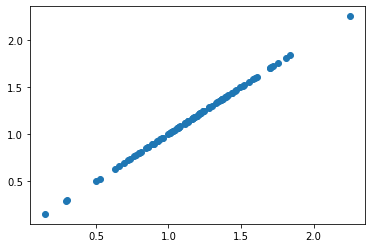

In [211]:
plt.scatter(y_test,y_test);

Ta có thể dễ dàng nhìn thấy các điểm được dự toán và các điểm để test nó khá sát nhau.

## Độ chính xác của mô hình

In [203]:
from sklearn import metrics
metrics.explained_variance_score(y_test, y_pred)

0.8955031999904332